Mercedes-Benz Greener Manufacturing.
Project 1 

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

2. Check for null and unique values for test and train sets.

3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
#Import data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [4]:
#Check few observations to see how data looks
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Check shape of data
train_data.shape

(4209, 378)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 366 entries, ID to X385
dtypes: float64(1), int64(357), object(8)
memory usage: 11.8+ MB


In [6]:
# Remove columns ID and Y from the data as they are not used for learning
valid_features = list(set(train_data.columns) - set(['ID', 'y']))
#valid_features[1:5]

In [7]:
x_train = train_data[valid_features]
x_test = test_data[valid_features]

In [8]:
#If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
for column in valid_features:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1) # Column with only one 
        # value is useless so we drop it
        x_test.drop(column, axis=1)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
x_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,X307,X248,X219,X342,X322,X39,X108,X74,X85,X13,X8,X326,X44,X98,X167,X168,X213,X163,X77,X341,X171,X223,X170,X205,X216,X314,X43,X81,X251,X95,X296,X92,X161,X320,X147,X106,X258,X284,X291,X378,...,X166,X113,X202,X231,X285,X199,X312,X135,X242,X382,X173,X160,X17,X228,X194,X165,X138,X351,X164,X29,X186,X373,X33,X139,X359,X141,X256,X327,X178,X287,X298,X350,X324,X340,X357,X32,X14,X49,X288,X348
0,0,0,0,0,0,0,0,1,1,1,111,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,111,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,120,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,1,0,0,101,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,1,0,0,110,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [9]:
#Check for null and unique values for test and train sets.
train_data.isnull().any()

ID      False
y       False
X0      False
X1      False
X2      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 378, dtype: bool

In [10]:
train_data.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [11]:
#Check for duplicate data
train_data.duplicated().any()

False

In [12]:
train_data.duplicated().sum()

0

min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168
Count of values above 180: 1


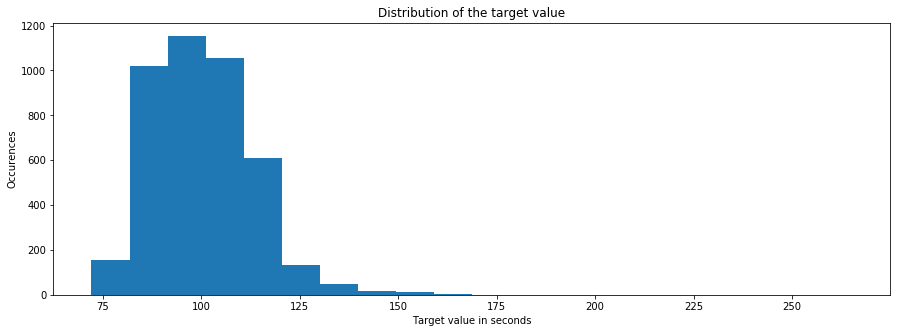

In [ ]:
import matplotlib.pyplot as plt
#Target variable distribution
y_train = train_data['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(y_train), max(y_train), y_train.mean(), y_train.std()))
print('Count of values above 180: {}'.format(np.sum(y_train > 200)))

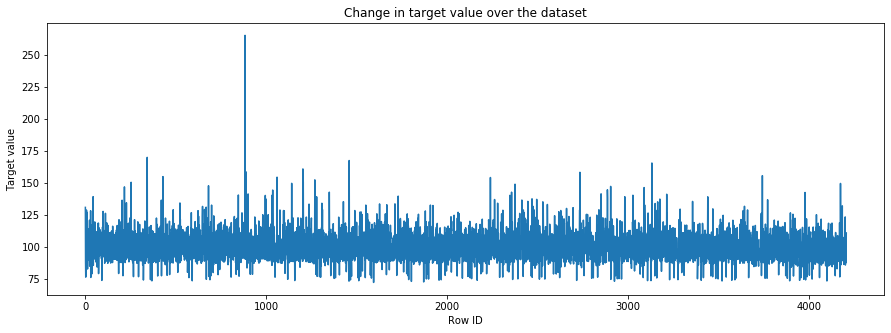

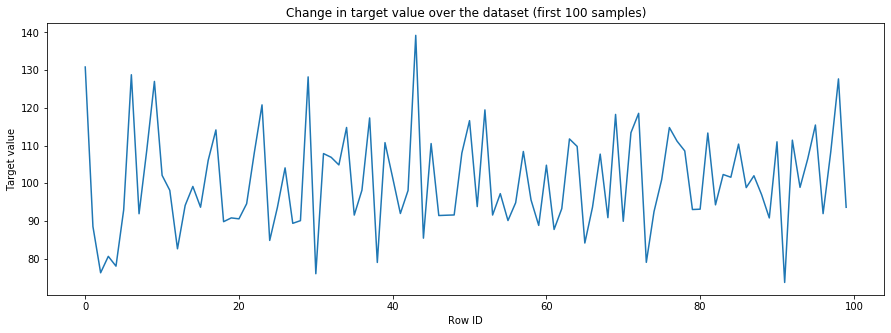

In [ ]:
#Distribution of target variable
plt.figure(figsize=(15, 5))
plt.plot(y_train)
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(y_train[:100])
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset (first 100 samples)')
print()

In [13]:
cols = [c for c in train_data.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
train_data[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

In [14]:
#Distribution of variables
counts = [[], [], []]
for c in cols:
    typ = train_data[c].dtype
    uniq = len(np.unique(train_data[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


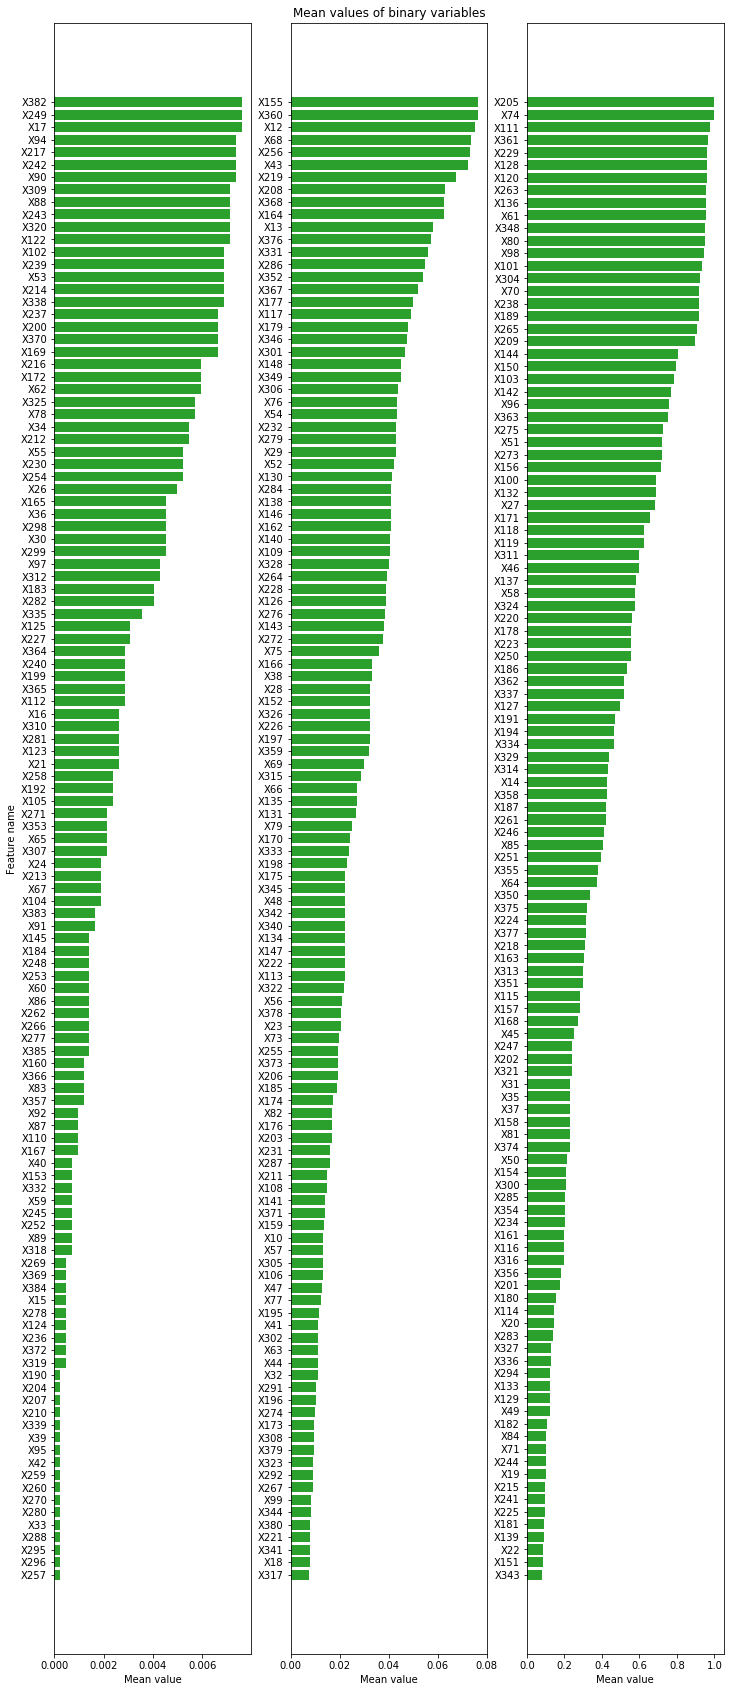

In [ ]:
import seaborn as sns
pal = sns.color_palette()
binary_means = [np.mean(train_data[c]) for c in counts[1]]
binary_names = np.array(counts[1])[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color=pal[2])
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

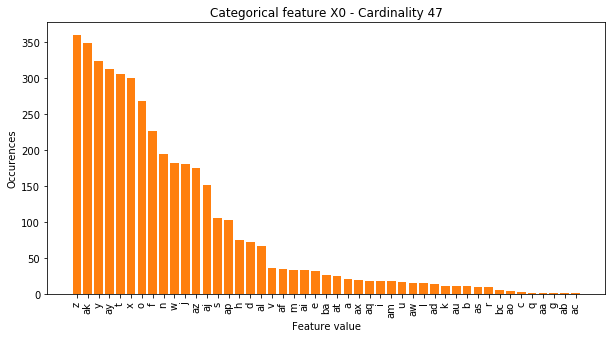

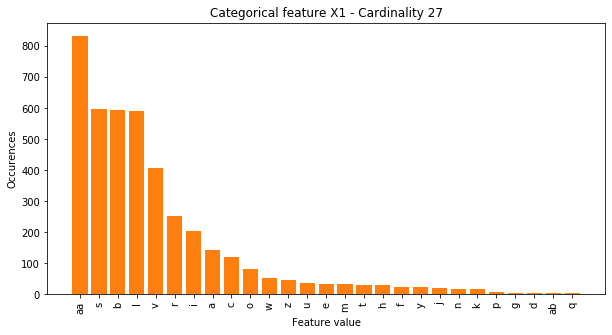

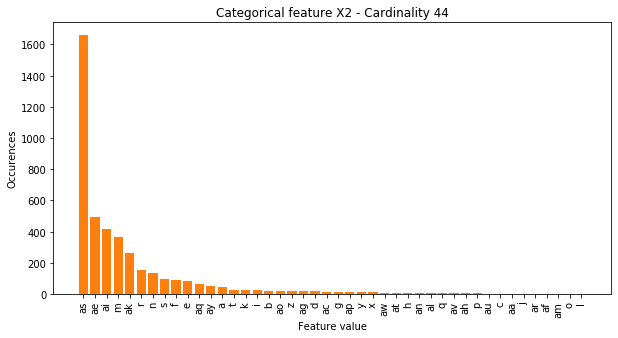

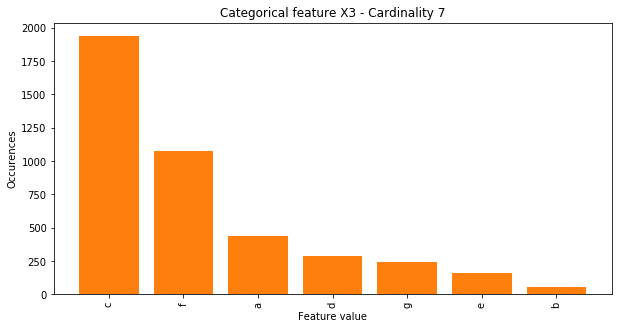

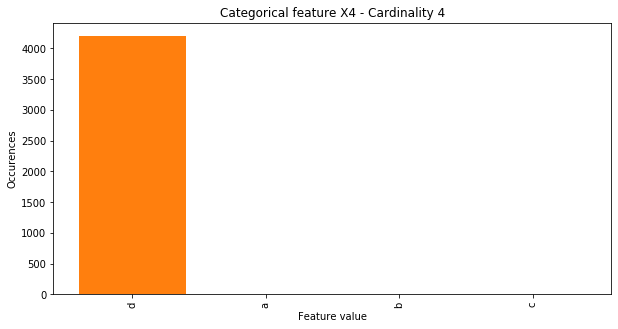

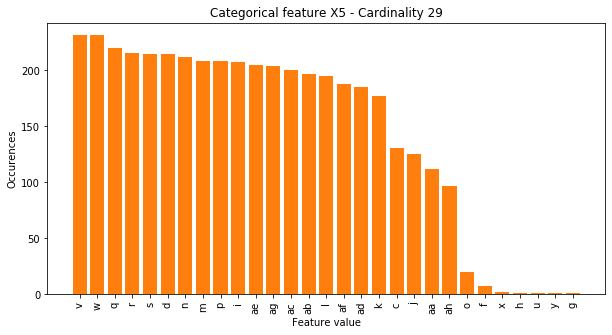

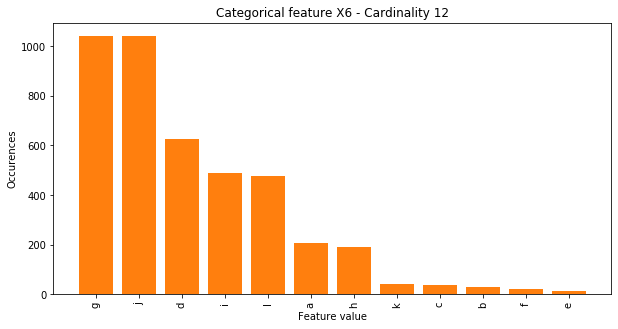

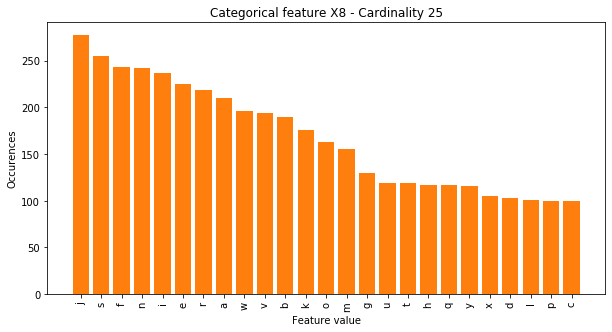

In [ ]:
for c in counts[2]:
    value_counts = train_data[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(train_data[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color=pal[1])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

In [15]:
usable_columns = list(set(train_data.columns) - set(['ID', 'y']))

y_train = train_data['y'].values
id_test = test_data['ID'].values

x_train = train_data[usable_columns]
x_test = test_data[usable_columns]

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1) # Column with only one value is useless so we drop it
        x_test.drop(column, axis=1)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
        
x_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,X307,X248,X219,X342,X322,X39,X108,X74,X85,X13,X8,X326,X44,X98,X167,X168,X213,X163,X77,X341,X171,X223,X170,X205,X216,X314,X43,X81,X251,X95,X296,X92,X161,X320,X147,X106,X258,X284,X291,X378,...,X166,X113,X202,X231,X285,X199,X312,X135,X242,X382,X173,X160,X17,X228,X194,X165,X138,X351,X164,X29,X186,X373,X33,X139,X359,X141,X256,X327,X178,X287,X298,X350,X324,X340,X357,X32,X14,X49,X288,X348
0,0,0,0,0,0,0,0,1,1,1,111,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,111,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,120,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,1,0,0,101,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,1,0,0,110,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [16]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, 
                early_stopping_rounds=50, 
                feval=xgb_r2_score, 
                maximize=True, 
                verbose_eval=10)

[08:42:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.1397	valid-rmse:98.2538	train-r2:-58.3426	valid-r2:-67.6247
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.1832	valid-rmse:80.2714	train-r2:-38.7928	valid-r2:-44.804
[20]	train-rmse:66.541	valid-rmse:65.5967	train-r2:-25.7332	valid-r2:-29.5876
[30]	train-rmse:54.6149	valid-rmse:53.6305	train-r2:-17.0092	valid-r2:-19.4459
[40]	train-rmse:44.9172	valid-rmse:43.8842	train-r2:-11.1814	valid-r2:-12.6899
[50]	train-rmse:37.0508	valid-rmse:35.9587	train-r2:-7.28831	valid-r2:-8.19158
[60]	train-rmse:30.6913	valid-rmse:29.5289	train-r2:-4.68723	valid-r2:-5.19837
[70]	train-rmse:25.5745	valid-rmse:24.3337	train-r2:-2.949	valid-r2:-3.20918
[80]	train-rmse:21.4844	valid-rmse:20.1551	train-r2:-1.78687	valid-r2:-1.88769
[90]	train-rmse:18.2427	va

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import r2_score

In [19]:
random_seed = 0
random.seed(random_seed)
np.random.seed(random_seed)

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

In [24]:
# Remove non-informative columns
cols_to_remove = []
for c in test_data.columns:
    if len(train_data[c].unique()) == 1:
        cols_to_remove.append(c)
print('Columns to remove: ' + str(cols_to_remove))
train_data = train_data.drop(cols_to_remove, axis=1)
test_data = test_data.drop(cols_to_remove, axis=1)

Columns to remove: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [29]:
# Process columns, apply LabelEncoder to categorical features
for c in train_data.columns:
    if train_data[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train_data[c].values) + list(test_data[c].values)) 
        train_data[c] = lbl.transform(list(train_data[c].values))
        test_data[c] = lbl.transform(list(test_data[c].values))

In [32]:
import random
random_seed = 0
random.seed(random_seed)
np.random.seed(random_seed)

# Add decomposed components: PCA / ICA etc.
n_comp = 12

# PCA
pca = PCA(n_components=n_comp, random_state=random_seed)
pca2_results_train = pca.fit_transform(train_data.drop(["y"], axis=1))
pca2_results_test = pca.transform(test_data)

In [33]:
# ICA
ica = FastICA(n_components=n_comp, random_state=random_seed)
ica2_results_train = ica.fit_transform(train_data.drop(["y"], axis=1))
ica2_results_test = ica.transform(test_data)

In [35]:
# Append decomposition components to datasets
for i in range(1, n_comp+1):
    train_data['pca_' + str(i)] = pca2_results_train[:, i-1]
    test_data['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    train_data['ica_' + str(i)] = ica2_results_train[:, i-1]
    test_data['ica_' + str(i)] = ica2_results_test[:, i-1]


In [37]:
# Prepare data
X = np.array(train_data.drop(['y'], axis=1))
y = train_data.y.values

y_mean = np.mean(y)

X_test = np.array(test_data)
ids_test = test_data.ID.values

print('X.shape = ' + str(X.shape) + ', y.shape = ' + str(y.shape))
print('X_test.shape = ' + str(X.shape))


X.shape = (4209, 389), y.shape = (4209,)
X_test.shape = (4209, 389)


In [38]:
#Run xgboost model
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score

params = {}
params['n_trees'] = 500
params['objective'] = 'reg:linear'
params['eta'] = 0.005
params['max_depth'] = 4
params['subsample'] = 0.95
params['base_score'] = y_mean
params['silent'] = 1

xgb_r2_buf = []
test_preds_buf = []
d_test = xgb.DMatrix(X_test)

cv = ShuffleSplit(n_splits=15, test_size=0.19, random_state=random_seed)
fold_i = 0
for train_index, test_index in cv.split(X):
    print('Fold #' + str(fold_i))
    x_train, x_valid, y_train, y_valid = X[train_index], X[test_index], y[train_index], y[test_index]

    d_train = xgb.DMatrix(x_train, label=y_train)
    d_valid = xgb.DMatrix(x_valid, label=y_valid)   

    print('XGB: Evaluating model')
    eval_set = [(x_train, y_train), (x_valid, y_valid)]
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    model = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, \
        feval=xgb_r2_score, maximize=True, verbose_eval=100)
        
    p = model.predict(d_valid)
    r2 = r2_score(y_valid, p)
    xgb_r2_buf.append(r2)
    print('R2 = ' + str(r2))

    test_preds_buf.append(model.predict(d_test))

    fold_i += 1

print('XGB Mean R2 = ' + str(np.mean(xgb_r2_buf)) + ' +/- ' + str(np.std(xgb_r2_buf)))

print('XGB: Train on full dataset and predicting on test')
d_train = xgb.DMatrix(X, label=y)
watchlist = [(d_train, 'train')]
model = xgb.train(params, d_train, 700, watchlist, feval=xgb_r2_score, \
    maximize=True, verbose_eval=100)

p_test = model.predict(d_test)

test_preds_buf = np.array(test_preds_buf).T
test_preds_buf = np.concatenate((test_preds_buf, p_test.reshape((len(p_test),1))), axis=1)

Fold #0
XGB: Evaluating model
[0]	train-rmse:12.3894	valid-rmse:13.6621	train-r2:0.005959	valid-r2:0.002864
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[100]	train-rmse:9.68273	valid-rmse:11.4665	train-r2:0.392848	valid-r2:0.297604
[200]	train-rmse:8.41805	valid-rmse:10.5854	train-r2:0.541093	valid-r2:0.401397
[300]	train-rmse:7.85625	valid-rmse:10.266	train-r2:0.600302	valid-r2:0.436983
[400]	train-rmse:7.58701	valid-rmse:10.1627	train-r2:0.627228	valid-r2:0.44825
[500]	train-rmse:7.41642	valid-rmse:10.1317	train-r2:0.643803	valid-r2:0.451619
[600]	train-rmse:7.29334	valid-rmse:10.1268	train-r2:0.655528	valid-r2:0.452147
Stopping. Best iteration:
[640]	train-rmse:7.25056	valid-rmse:10.1249	train-r2:0.659557	valid-r2:0.452352

R2 = 0.4523013137563864
Fold #1
XGB: Evaluating model
[0]	train-rmse:12.7575	valid-rmse:12.1331	train-r2:0.005449	valid-r2:0.002204
Multiple eval metrics have been pa

In [39]:
p_test

array([ 80.14822, 100.27457,  79.97081, ...,  93.75133, 110.3681 ,
        92.68803], dtype=float32)

In [40]:
test_preds_buf

array([[ 80.584274,  80.72041 ,  81.47038 , ...,  81.53689 ,  79.49252 ,
         80.14822 ],
       [101.7169  , 102.591774, 102.74518 , ..., 100.30648 , 101.17661 ,
        100.27457 ],
       [ 80.93468 ,  80.09445 ,  80.143295, ...,  80.15557 ,  80.3536  ,
         79.97081 ],
       ...,
       [ 94.09815 ,  94.71907 ,  93.38215 , ...,  94.013336,  94.0206  ,
         93.75133 ],
       [110.13595 , 111.49655 , 110.360344, ..., 109.539314, 110.23711 ,
        110.3681  ],
       [ 93.4367  ,  93.98731 ,  92.84862 , ...,  92.93176 ,  93.40177 ,
         92.68803 ]], dtype=float32)